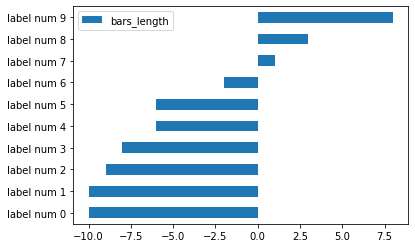

In [48]:
import matplotlib as plt
import numpy as np
import pandas as pd

bars_length = np.random.randint(-10, 10, 10)
bars_length.sort()



index = ['label num {}'.format(i) for i in range(10)]


df = pd.DataFrame({'bars_length': bars_length}, index=index)
ax = df.plot.barh()

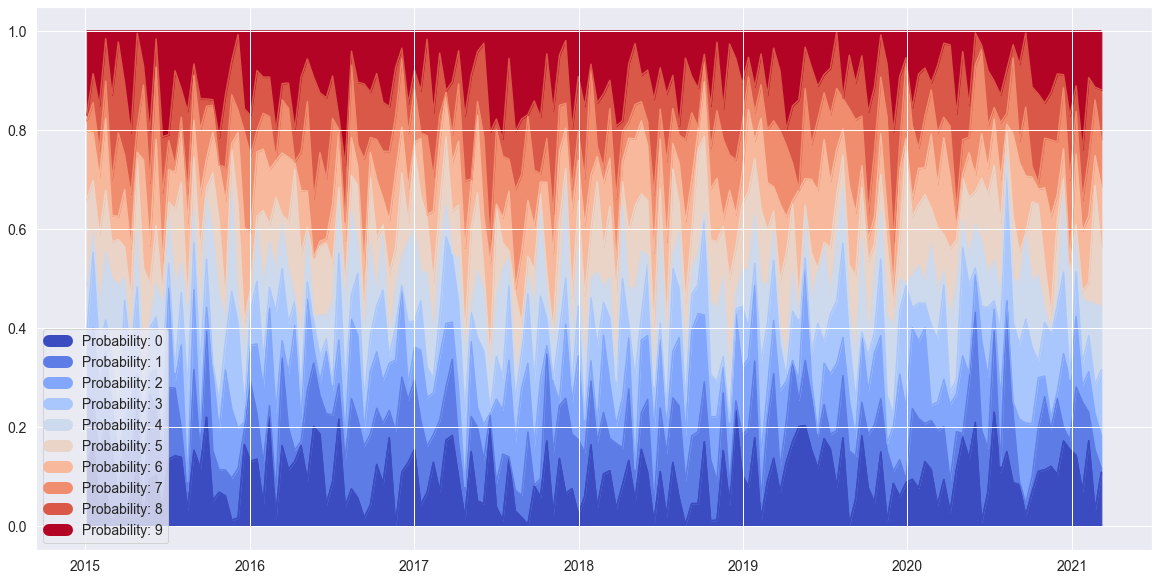

In [29]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
import numpy as np
import pandas as pd

ncols = 10
figsize = (20, 10)
fontsize = 14

dti = pd.date_range('2015-01-01', '2021-3-16', freq='2W')
probabilities_in_time = np.random.random((ncols, len(dti)))
probabilities_in_time = probabilities_in_time / \
    probabilities_in_time.sum(axis=0)
probabilities_in_time = pd.DataFrame(probabilities_in_time).T
probabilities_in_time.index = dti

cm_subsection = np.linspace(0, 1, ncols)
colors = [cm.coolwarm(x) for x in cm_subsection]


def plot_time_probabilities(probabilities_in_time, figsize):
    plt.figure(figsize=figsize)
    plt.yticks(np.arange(0, 1.2, 0.2), fontsize=fontsize)
    plt.xticks(fontsize=fontsize)

    draw_stack_plot(colors, probabilities_in_time)
    set_grid()
    set_legend()

    plt.show()


def draw_stack_plot(colors, probabilities_in_time):
    for i, color in enumerate(colors):
        if i == 0:
            plt.plot(probabilities_in_time[i], color=color)
            plt.fill_between(probabilities_in_time.index,
                             probabilities_in_time[0], color=color)

        else:
            probabilities_in_time[i] += probabilities_in_time[i-1]
            plt.fill_between(probabilities_in_time.index,
                             probabilities_in_time[i], probabilities_in_time[i-1],
                             color=color)

        plt.plot(probabilities_in_time[i], label=' Probability: {}'.format(
            i), color=color)


def set_grid():
    ax = plt.gca()
    ax.set_axisbelow(False)
    ax.xaxis.grid(True, linestyle='-', lw=1)


def set_legend():
    leg = plt.legend(loc='lower left', fontsize=14, handlelength=1.3)
    for i in leg.legendHandles:
        i.set_linewidth(12)


plot_time_probabilities(probabilities_in_time, figsize)

In [33]:
import numpy as np 
from pandas import DataFrame
import matplotlib.pyplot as plt



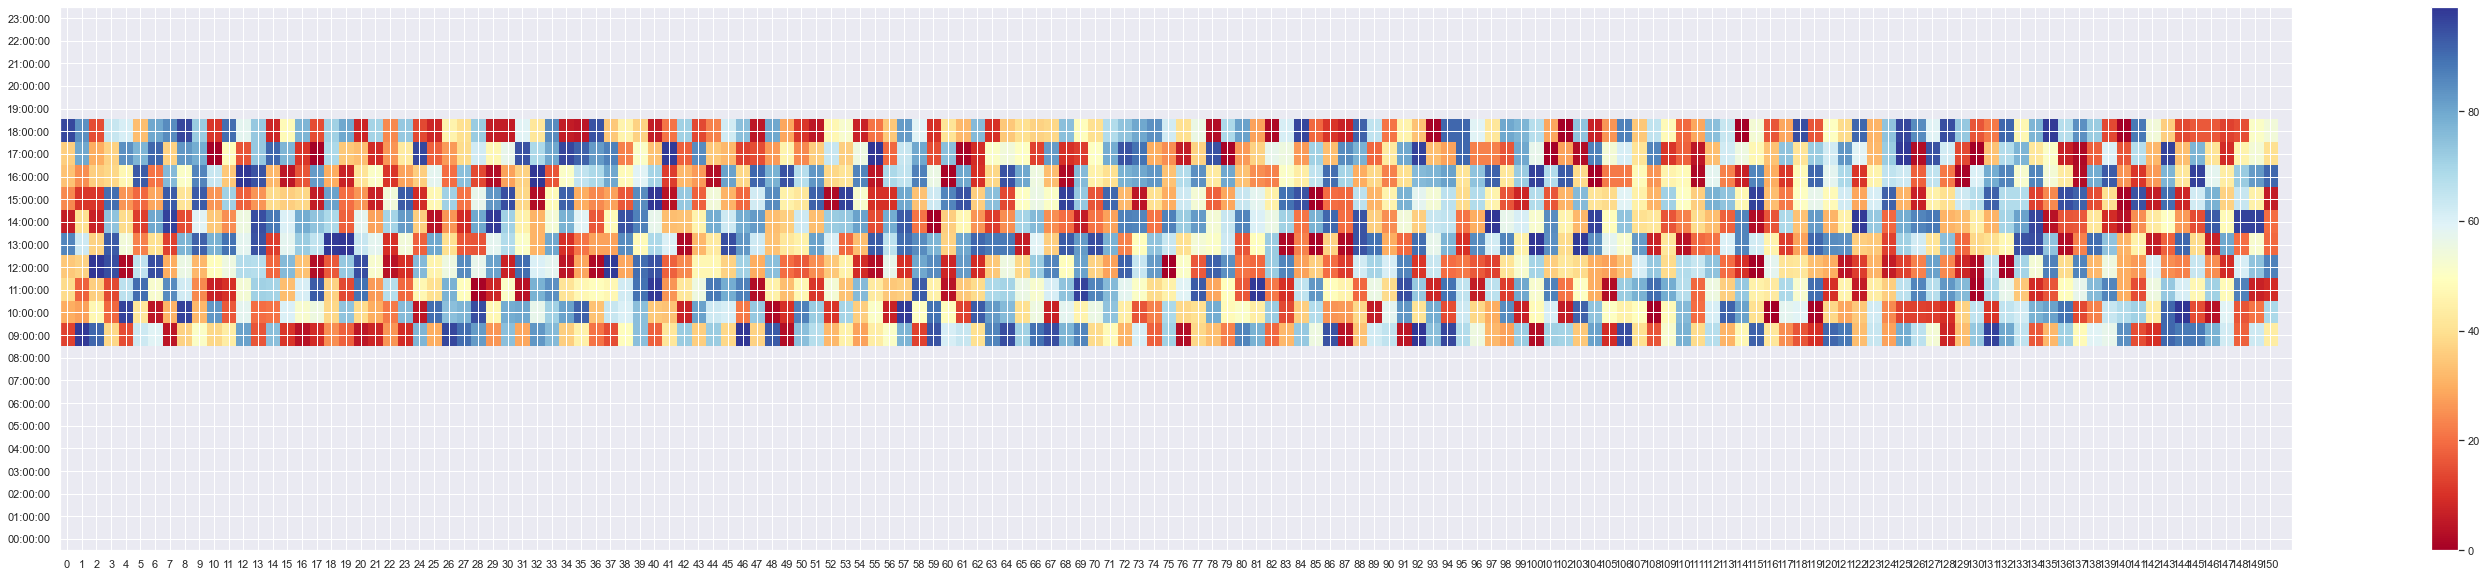

In [44]:
import numpy as np 
from pandas import DataFrame
import matplotlib.pyplot as plt

intraday = pd.Series(np.random.randint(0, 100, 3625), index=pd.date_range('2020-02-01', '2020-07-01', freq='H'))
intraday.loc[(intraday.index.hour < 9) | (intraday.index.hour > 18)] = np.nan
def plot_intraday_ts(intraday):
    fig = plt.figure(figsize = (50, 10))
    df = intraday.to_frame()
    df = pd.DataFrame({'Date': intraday.index.time, 'Time': intraday.index.date, 'Temperature': df[0]})
    newdf = df.pivot(index='Date', columns='Time', values='Temperature')
    plt.imshow(newdf, cmap='RdYlBu', aspect='auto', origin='lower')
    plt.colorbar()
    ax = plt.gca()
    ax.set_xticks(np.arange(len(newdf.columns)-1))
    ax.set_yticks(np.arange(len(newdf.index)))
    ax.set_yticklabels(newdf.index)
    ax.set_xticks(np.arange(0,len(newdf.columns)-1), minor=True)
    ax.set_yticks(np.arange(0,len(newdf.index)), minor=True)
    ax.grid(which='minor', color='white', linestyle='-', linewidth=0)
plot_intraday_ts(intraday)